In [1]:
#author: Hasan Tasnveer Mahmood 1725413
#here i have set the directory of the file

import pandas as pd
import os
os.chdir("F:/SEM 05/MACHINE LEARNING/ASSIGNMENTS/IndAssignment/Dataset 7/")

#set the collum names
col_names = ['animal_name','hair', 'feathers', 'eggs','milk', 'airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','class_type']

#read Data fom a file
dataset = pd.read_csv("zoo.csv", header = 0, names = col_names)
# i want to ignore 1 row so i set header = 0

In [2]:
dataset.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [3]:
#show the datatype and null collumns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
#here i choose the specific collum which i will compare.
feature_cols = ['domestic','backbone','breathes']
x = dataset[feature_cols]
y = dataset.predator

In [5]:
from sklearn.model_selection import train_test_split
# i have spilt data into 75 and 25%
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.27, random_state = 0)

In [6]:
#check the lenght of train data
len(x_train)

73

In [7]:
#lenght of test set
len(x_test)

28

In [8]:
from sklearn.linear_model import LogisticRegression
# here i tune my logistict regression model so that i can get more accuracy
# In my case i use the value for c as parameter range is 1, C can change [0.001, 0.01, 0.1, 1 , 10, 100]
#But my case i get more accuracy with 1
logreg = LogisticRegression(penalty = 'l2', C = 1,random_state = 0)

logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

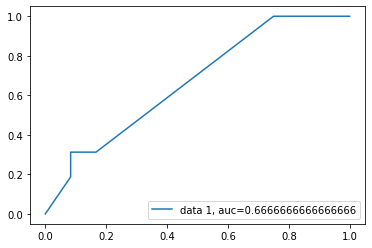

In [9]:
import sklearn.metrics as metrics
from matplotlib import pyplot as plt
y_pred = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [10]:
#Random Forest
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(105):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    current_accuracy = round(accuracy_score(y_pred,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
rf = RandomForestClassifier(random_state=best_x)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

In [11]:
from sklearn import metrics
#here i declare a confution matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[ 4,  8],
       [ 0, 16]], dtype=int64)

In [12]:
#For visualizing this library need to import
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

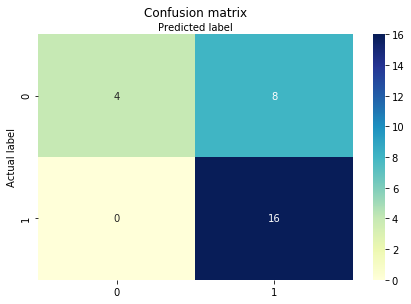

In [13]:
# This is the name of classes.
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame (cnf_matrix), annot=True, cmap="YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
print("Acuracy : ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Acuracy :  0.7142857142857143
Precision:  0.6666666666666666
Recall:  1.0


In [17]:
sensitivity1 = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.3333333333333333
Specificity :  1.0
